In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("/home/aman/Downloads/kepler_data.csv")
df.replace({'CONFIRMED': 0, 'CANDIDATE': 1,'FALSE POSITIVE':-1}, inplace=True)
df = df.drop(columns=['kepid','kepoi_name','kepler_name','koi_pdisposition'])
df=df.dropna(axis=1, how='all')
df = df.drop(columns=df.select_dtypes(include=['object']).columns)
df= df.interpolate(method='linear')
train, test = train_test_split(df, test_size=0.2,random_state=0)
scaler = MinMaxScaler()

In [3]:
X = train.iloc[:,1:] # Select From 2nd to end
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
Y = train.iloc[:,0]
x = test.iloc[:,1:] # Select From 2nd to end
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
y = test.iloc[:,0]

In [9]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.1,max_depth=1, random_state=0).fit(X,Y)
y_pred=clf.predict(x)
print(accuracy_score(y,y_pred))

0.8797699947726084


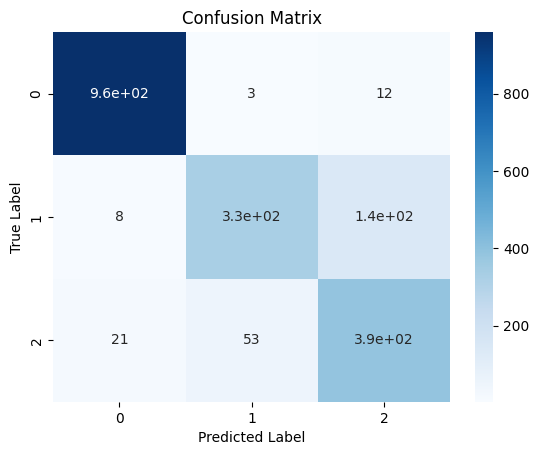

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(x)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()